In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
data = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data.append(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
from pathlib import Path

from plotnine import *
import os
# suppress tf informational and warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras import backend as K

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn import metrics

import category_encoders as ce


%matplotlib inline
%config InlineBackend.figure_format='retina'

RANDOM_STATE = 2112
keras.utils.set_random_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
INPUT_DIR = Path('/kaggle/input/playground-series-s4e7')
TARGET_NAME = 'Response'

train_data = pd.read_csv(INPUT_DIR / 'train.csv')
test_data = pd.read_csv(INPUT_DIR / 'test.csv')

cont_features = []    
cat_features = [
    'Gender', 'Driving_License', 'Previously_Insured', 
    'Vehicle_Age', 'Vehicle_Damage', 
    'Policy_Sales_Channel', 'Region_Code', 'Age', 'Vintage', 'Annual_Premium']

def fe(df):
    return df

# convert to pipeline:
all_data = fe(pd.concat([test_data, train_data]))

oe = preprocessing.OrdinalEncoder()
all_data[cat_features] = oe.fit_transform(all_data.filter(cat_features)).astype('int')

cat_features_card = {}
for f in cat_features:
    cat_features_card[f] = 1 + all_data[f].max()


# treat the 0-1 features as continuous
# everything else will go into an embedding layer.
cont_features = [
    'Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage']
cat_features = [ 
    'Vehicle_Age', 'Policy_Sales_Channel', 
    'Region_Code', 'Age', 'Vintage', 'Annual_Premium']

train_data = all_data.query(f"not {TARGET_NAME}.isna()")
test_data  = all_data.query(f"{TARGET_NAME}.isna()").drop(columns=[TARGET_NAME])
features = cont_features + cat_features

# tidy up
all_data = None
import gc
gc.collect()

28

In [5]:
df_train = train_data.drop(columns =['id'])
df_test= test_data.drop(columns= ['id'])

In [5]:
df_train = pd.read_csv(data[1])
df_test = pd.read_csv(data[2])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline


In [8]:
df_train = df_train.drop(columns =['id'])
df_test.drop(columns= ['id'],inplace= True)

In [ ]:
df_train

Text(0.5, 1.0, 'Target Distribution')

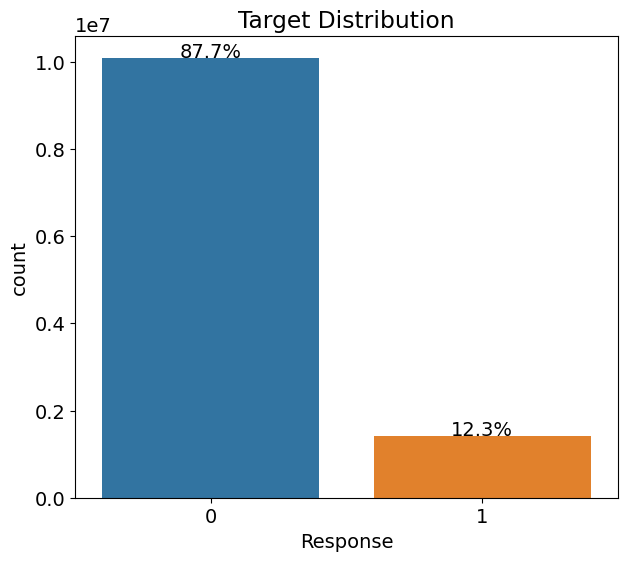

In [20]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()      # 도형 높이(데이터 개수)
        width = patch.get_width()        # 도형 너비
        left_coord = patch.get_x()       # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100  # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,     # x축 위치
                y=height + total_size*0.001,  # y축 위치
                s=f'{percent:1.1f}%',         # 입력 텍스트
                ha='center')                  # 가운데 정렬
    
plt.figure(figsize=(7, 6))

ax = sns.countplot(x=df_train['Response'],data = df_train)
write_percent(ax,len(df_train))
ax.set_title('Target Distribution')

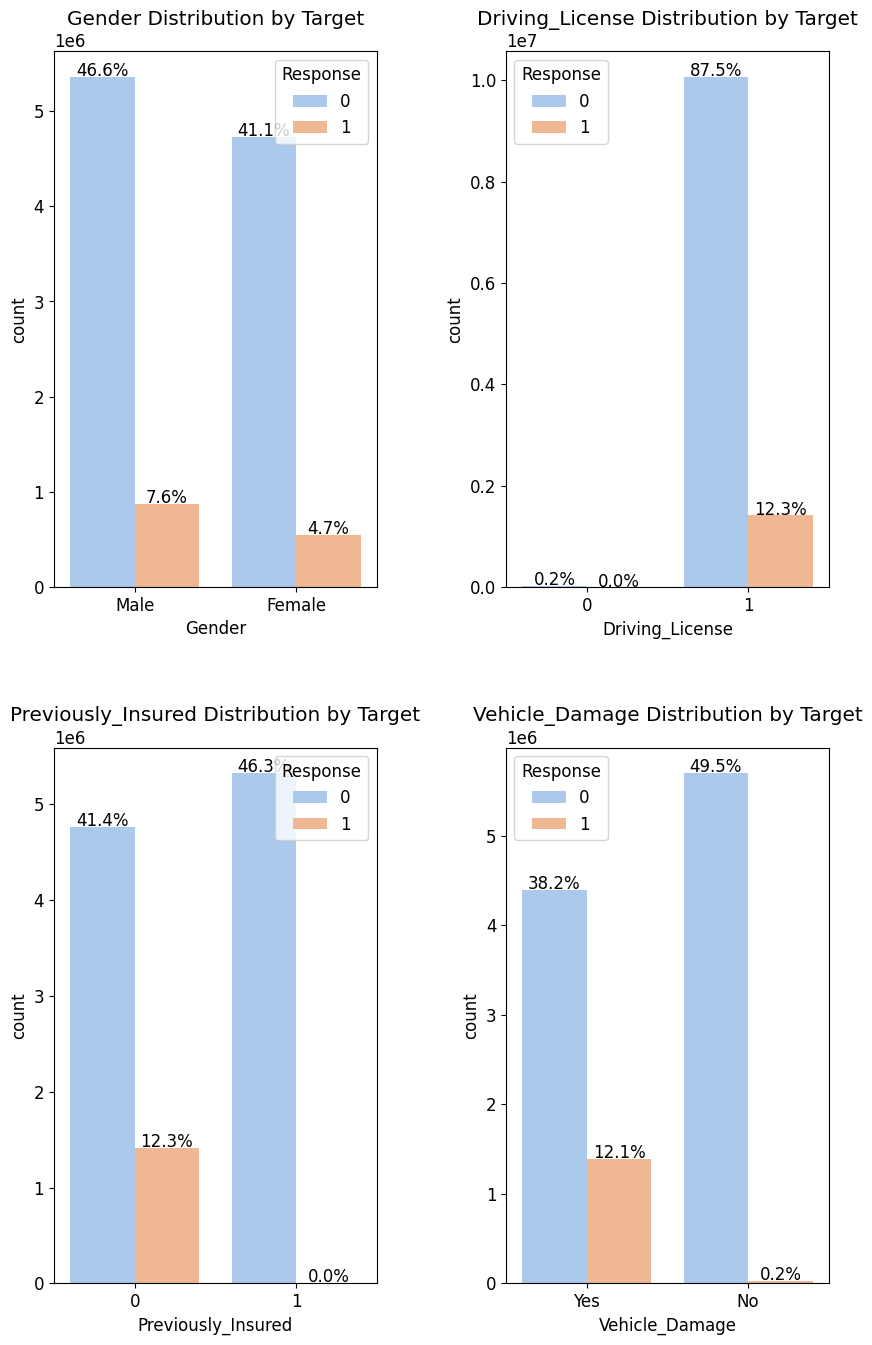

In [22]:
import matplotlib.gridspec as gridspec  # 여러 그래프를 격자 형태로 배치
# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(2, 2)  # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))    # 전체 Figrue 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3)  # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage']  # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])  # 격자(grid)에서 이번 서브플롯을 그릴 위치를 ax축으로 지정
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,         # 피처
                  data=df_train,        # 전체 데이터셋
                  hue='Response',      # 세부적으로 나눠 그릴 기준 피처
                  palette='pastel',  # 그래프 색상 설정
                  ax=ax)             # 그래프를 그릴 축
    
    ax.set_title(f'{feature} Distribution by Target')  # 그래프 제목 설정
    write_percent(ax,len(df_train))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

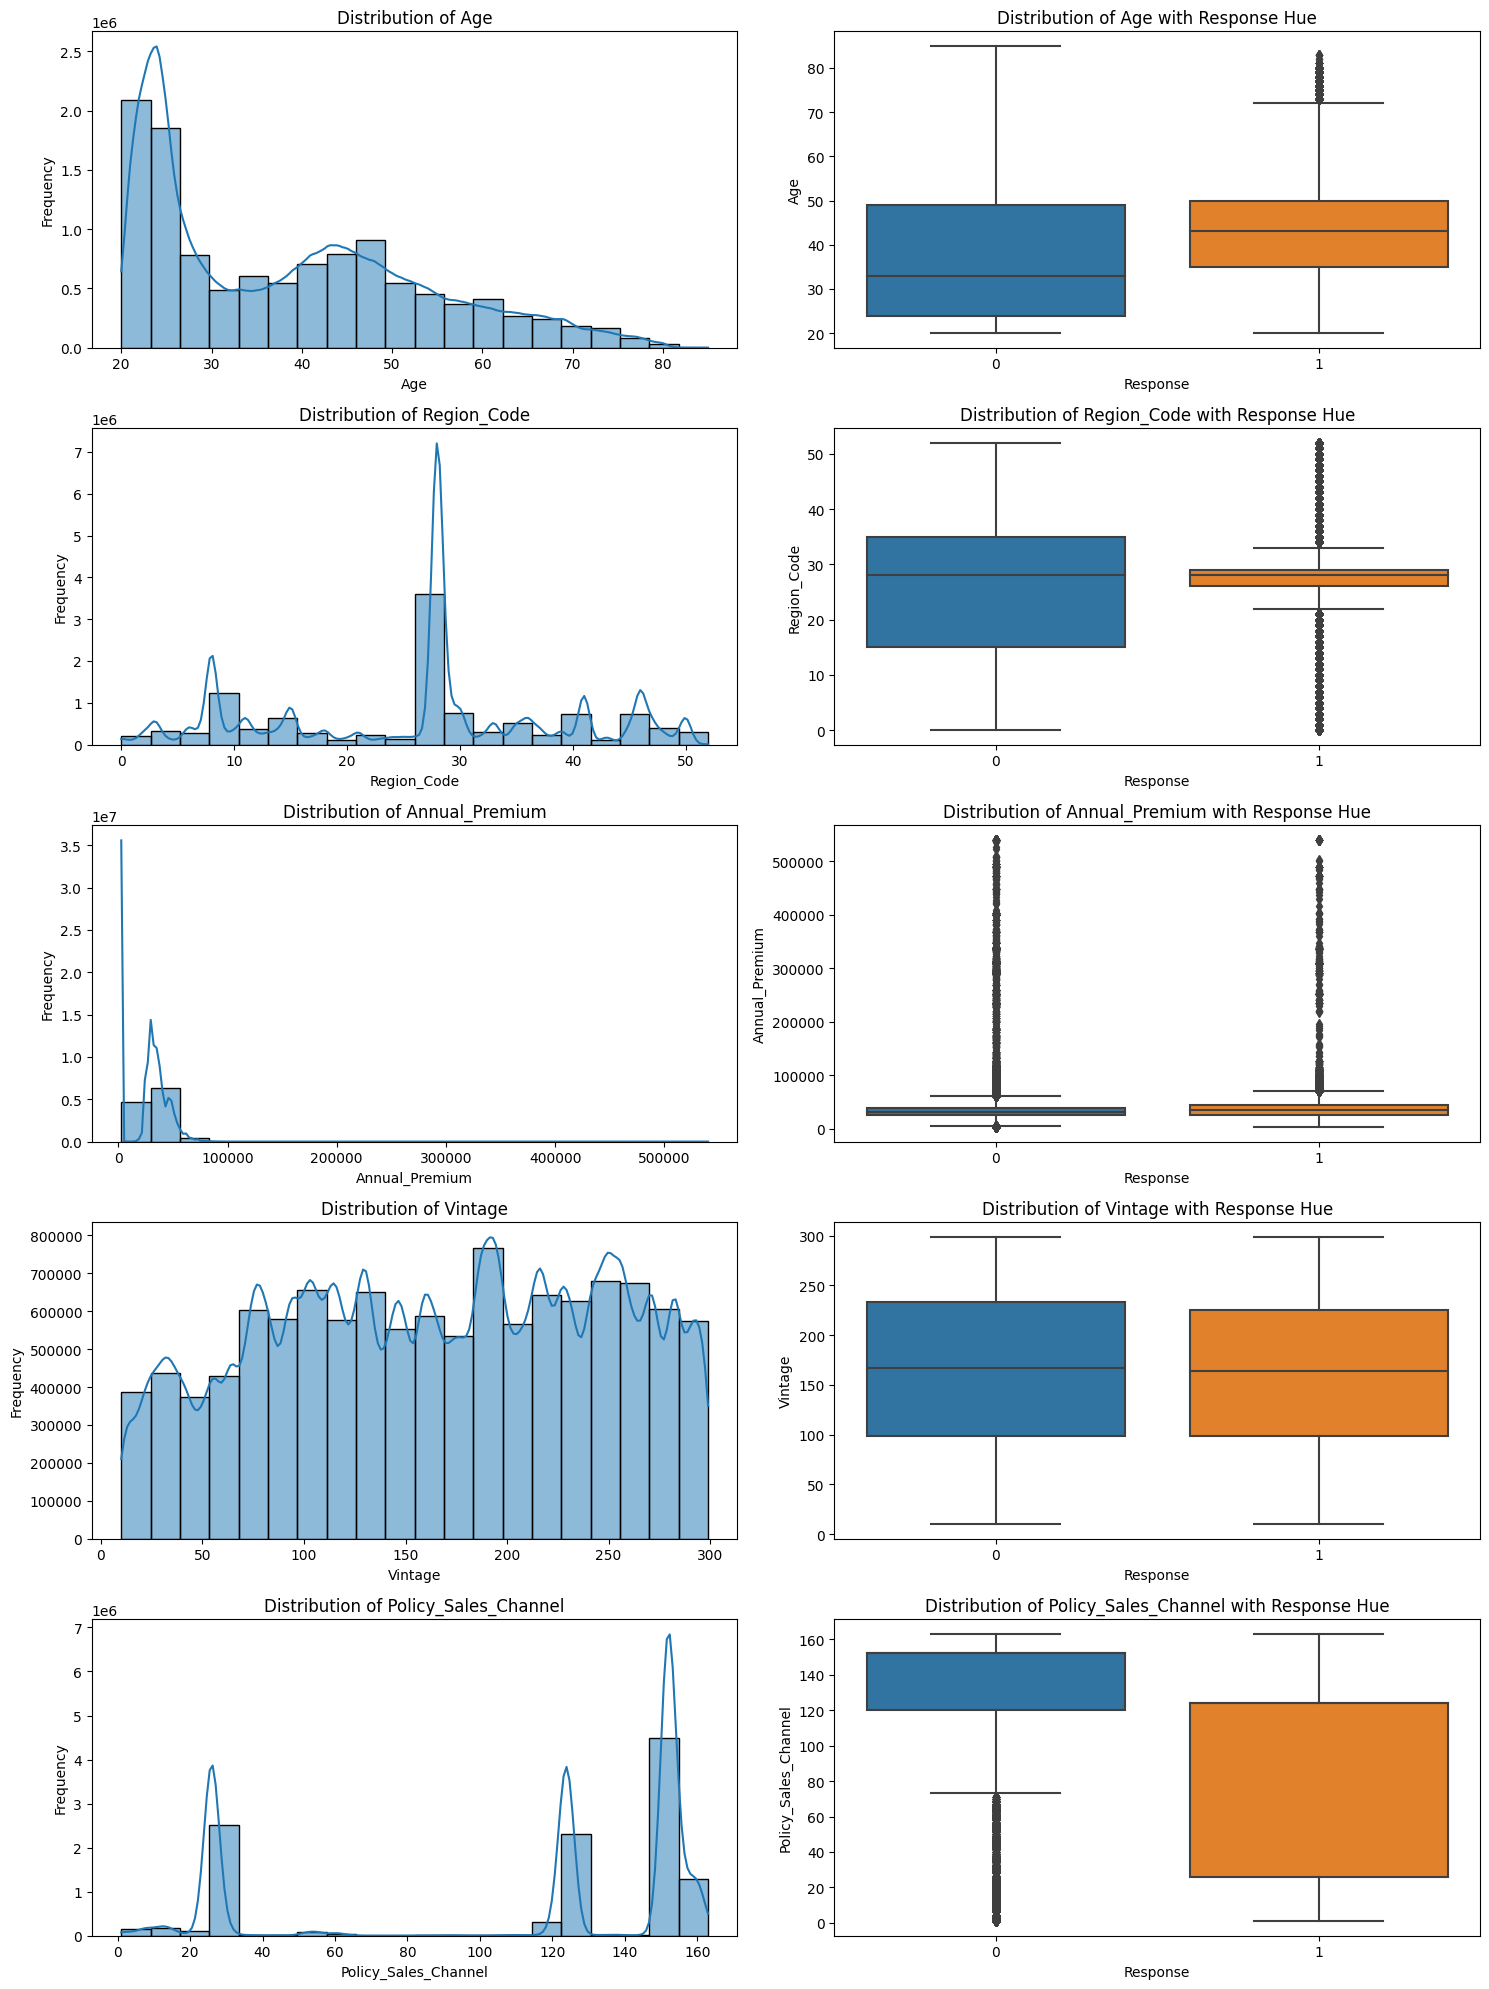

In [7]:
numerical_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage', 'Policy_Sales_Channel']

# Create subplots with 5 rows and 2 columns
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 20))

# Iterate over each selected column
for i, column in enumerate(numerical_cols):
    # Plot without hue on the left
    sns.histplot(data=df_train, x=column, kde=True, bins=20, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Plot with hue on the right
    sns.boxplot(data=df_train, y=column, x='Response', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} with Response Hue')
    axes[i, 1].set_xlabel('Response')
    axes[i, 1].set_ylabel(column)

plt.tight_layout()
plt.show()

In [9]:
def function1(t):
    if t =='Female':
        return 0
    elif t == 'Male':
        return 1
    else:
        return None

def function2(t):
    if t == '1-2 Year':
        return 1
    elif t == '> 2 Years':
        return 3
    elif '< 1 Year':
        return 0
    else:
        return None
    
def function3(t):
    if t =='No':
        return 0
    elif t == 'Yes':
        return 1
    else:
        return None
    
trans1 = [function1(t) for t in df_train['Gender']]
trans2 = [function2(t) for t in df_train['Vehicle_Age']]
trans3 = [function3(t) for t in df_train['Vehicle_Damage']]

df_train['Gender'] = pd.Series(data=trans1)
df_train['Vehicle_Age'] = pd.Series(data=trans2)
df_train['Vehicle_Damage'] = pd.Series(data=trans3)

trans1 = [function1(t) for t in df_test['Gender']]
trans2 = [function2(t) for t in df_test['Vehicle_Age']]
trans3 = [function3(t) for t in df_test['Vehicle_Damage']]

df_test['Gender'] = pd.Series(data=trans1)
df_test['Vehicle_Age'] = pd.Series(data=trans2)
df_test['Vehicle_Damage'] = pd.Series(data=trans3)



In [7]:
# df_train = pd.get_dummies(df_train, columns=["Gender", "Vehicle_Age", "Vehicle_Damage"])
# df_test = pd.get_dummies(df_test, columns=["Gender", "Vehicle_Age", "Vehicle_Damage"])

# df_train = df_train.replace({True: 1, False: 0})
# df_test = df_test.replace({True: 1, False: 0})

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X = df_train.loc[:, df_train.columns != "Response"]
y = df_train['Response']


X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.005, random_state=42)

print("Train set size:", X_train.shape)
print("Dev set size:", X_dev.shape)
# print("Test set size:", X_test.shape)

Train set size: (11447274, 10)
Dev set size: (57524, 10)


In [14]:
y

0           0
1           1
2           0
3           0
4           0
           ..
11504793    0
11504794    1
11504795    0
11504796    1
11504797    0
Name: Response, Length: 11504798, dtype: int64

In [6]:
df_train.rename(
    columns={
        "Vehicle_Age_1-2 Year": "Vehicle_Age_1_to_2 Year",
        "Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year",
        "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years",
    },
    inplace=True,
)
df_test.rename(
    columns={
        "Vehicle_Age_1-2 Year": "Vehicle_Age_1_to_2 Year",
        "Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year",
        "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years",
    },
    inplace=True,
)

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X = df_train.loc[:, df_train.columns != "Response"]
y = df_train['Response']


X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.005, random_state=42)

print("Train set size:", X_train.shape)
print("Dev set size:", X_dev.shape)
# print("Test set size:", X_test.shape)

2024-07-19 06:36:42.663778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 06:36:42.663937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 06:36:42.836881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train set size: (11447274, 10)
Dev set size: (57524, 10)


In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(512)

vel_ds = tf.data.Dataset.from_tensor_slices((X_dev, y_dev)).batch(512)

In [10]:
import tensorflow as tf

input = tf.keras.Input(shape=(14,))

x = tf.keras.layers.Dense(512)(input)
x = tf.keras.layers.BatchNormalization()(x)  # 배치 정규화 추가
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.BatchNormalization()(x)  # 배치 정규화 추가
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization()(x)  # 배치 정규화 추가
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.BatchNormalization()(x)  # 배치 정규화 추가
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(2)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=input, outputs=outputs)

# 모델 요약 출력
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,133 (719.27 KB)

 Trainable params: 182,213 (711.77 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,loss = 'binary_crossentropy', metrics =[ tf.keras.metrics.AUC(name='auc')])

In [12]:
history = model.fit(train_ds, 
                    validation_data=vel_ds,
                    epochs=50)


Epoch 1/50
   52/22358 ━━━━━━━━━━━━━━━━━━━━ 1:06 3ms/step - auc: 0.5100 - loss: 0.6509  

I0000 00:00:1721296047.616921      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721296047.636198      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22358/22358 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - auc: 0.7602 - loss: 0.3240 - val_auc: 0.8281 - val_loss: 0.2814
Epoch 2/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - auc: 0.8426 - loss: 0.2739 - val_auc: 0.8407 - val_loss: 0.2729
Epoch 3/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - auc: 0.8467 - loss: 0.2712 - val_auc: 0.8486 - val_loss: 0.2690
Epoch 4/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - auc: 0.8485 - loss: 0.2700 - val_auc: 0.8467 - val_loss: 0.2722
Epoch 5/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - auc: 0.8494 - loss: 0.2694 - val_auc: 0.8386 - val_loss: 0.2766
Epoch 6/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - auc: 0.8500 - loss: 0.2689 - val_auc: 0.8470 - val_loss: 0.2694
Epoch 7/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - auc: 0.8507 - loss: 0.2685 - val_auc: 0.8478 - val_loss: 0.2683
Epoch 8/50
22358/22358 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - auc: 0.8512 - loss: 0.2682 - val_auc: 0.8444 - val_loss: 0.2727
Epoch 9/50
22358/22358 ━━━━

In [13]:
pred = model.predict(df_test, batch_size = 512)


14981/14981 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step


In [14]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')
sub['Response'] = pred

In [15]:
sub.to_csv('submission3.csv', index = False)


In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

best_params = {
    'alpha': 1.302348865795227e-06, 
    'max_depth': 15, 
    'learning_rate': 0.061800451723613786, 
    'subsample': 0.7098803046786328, 
    'colsample_bytree': 0.2590672912533101, 
    'min_child_weight': 10, 
    'gamma': 0.8399887056014855, 
    'reg_alpha': 0.0016943548302122801, 
    'max_bin': 71284,
}
best_xgb_model = XGBClassifier(**best_params, n_estimators=12000, random_state=42, eval_metric="auc", device="cuda")
best_xgb_model.fit(
    X_train, y_train, eval_set=[(X_dev, y_dev)], early_stopping_rounds=50, verbose=500
)


[0]	validation_0-auc:0.74400
[500]	validation_0-auc:0.88625
[1000]	validation_0-auc:0.88774
[1500]	validation_0-auc:0.88850
[2000]	validation_0-auc:0.88895
[2500]	validation_0-auc:0.88939
[2701]	validation_0-auc:0.88947


XGBClassifier(alpha=1.302348865795227e-06, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2590672912533101, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.8399887056014855,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.061800451723613786,
              max_bin=71284, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12000, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
y_pred_prob = best_xgb_model.predict_proba(X_dev)[:, 1]
score = roc_auc_score(y_dev, y_pred_prob)
print(score)

0.8894758020750655


In [9]:
preb_prob = best_xgb_model.predict_proba(df_test)[:, 1]

submission = pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")
submission["Response"] = preb_prob

submission.to_csv("submissiongboost_2.csv", index=False)
